# Two-way Analysis of Variance

In the vast majority of experiments, there exist more than one treatment factor.  This may be by design, or unintentional.  For example, we may be interested in the yield of some chemical process as a function of BOTH the temperature AND the pressure, and we would collect data for a range of temperatures and pressures.  Or, we might be studying some disease process where there are a multitude of factors (age, sex, race, weight, height, etc.) that could affect the data.  We might only be interested in understanding the dependence on age, but of course we need to take into account all of the other factors.  Moreover, we need to consider the CORRELATION between various factors.  Two-way ANOVA is designed to allow us to carry out this type of analysis.

Suppose that we have an experiment that depends on two factors, $A$ and $B$.  Our data collection might look like this:

Number of groups associated with factor $A = a$

Number of groups associated with factor $B = b$

Number of settings of the experiment = $ab$

Number of data points for each setting $A/B$ of the experiment = $n$

Total number of data points = $N = n \cdot a \cdot b$

The various relevant degrees of freedom are calculated as follows:

$\nu_A = a - 1$

$\nu_B = b - 1$

$\nu_{AB} = (a-1)(b-1)$

If we consider the total number of treatment degrees of freedom, that must be equal to $ab - 1$.  As a check, we can calculate that:

$\nu_{treatment} = \nu_A + \nu_B + \nu_{AB} = (a - 1) + (b - 1) + (a-1)(b-1) = a + b - 2 + ab - b - a + 1 = ab - 1$

The total number of degrees of freedom is, as usual:

$\nu_{total} = N - 1 = nab - 1$ 

From here, we can calculate the number of error degrees of freedom:

$\nu_{error} = \nu_{total} - \nu_{treatment} = nab - 1 - (ab - 1) = nab - ab = ab(n - 1)$

This reveals an important experiment design consideration.  In order to measure correlations ($\nu_{AB}$) AND statistical fluctuations ($\nu_{error}$) simultaneously, we MUST have multiple data points at each setting of the
experiment!  That is, we must have $n \ge 2$.

The calculation of the various sums-of-squares (SS) is more complicated than in one-way ANOVA, but is straightforward:

The overall average of all $N$ data points = $\bar{\bar{x}} = \frac{1}{N} \sum_{k=1}^{b} \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ijk}}$

The average of the $n$ data points for setting = $\bar{x}_{ik} = \frac{1}{n} \sum_{j=1}^{n} {x_{ijk}}$

The average of the $b\cdot n$ data points for group a = $\bar{x}_i = \frac{1}{nb} \sum_{k=1}^{b} \sum_{j=1}^{n} {x_{ijk}}$

The average of the $a\cdot n$ data points for group b = $\bar{x}_k = \frac{1}{na} \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ijk}}$

The sums of squares are then:

$SS_{total} = \sum_{k=1}^{b} \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ijk}-\bar{\bar{x}})^2} = (N-1) \cdot S^2$

$SS_{treatment} = \sum_{k=1}^{b} \sum_{i=1}^{a} n(\bar{x}_{ik} - \bar{\bar{x}})^2$

We can calculate the error sum of squares using:

$SS_{error} = SS_{total} - SS_{treatment}$

Finally, we can calculate the individual factor and correlation sums of squares using:

$SS_{A} = \sum_{i=1}^{a} nb(\bar{x}_{i} - \bar{\bar{x}})^2$

$SS_{B} = \sum_{k=1}^{b} na(\bar{x}_{k} - \bar{\bar{x}})^2$

$SS_{AB} = SS_{treatment} - SS_{A} - SS_{B}$

# Example 1 - Two Way ANOVA with Raw Data

Consider the following set of raw data:

$$
\begin{matrix}
63 &	47 &	48 \\
52 &	49 &	50 \\
47 &	45 &	51 \\
49 &	45 &	50 \\
\end{matrix}
$$

where we see that at each setting of the experiment, we have collected a single data point (n = 1).  We will call each row a setting of factor $A$ (i=1..4), and each column a setting of factor $B$ (k=1..3). 

Because we only have a single data point at each setting, we CANNOT measure correlations!



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

xijk = np.array([[63,1,1],[47,1,2],[48,1,3],
                [52,2,1],[49,2,2],[50,2,3],
                [47,3,1],[45,3,2],[51,3,3],
                [49,4,1],[45,4,2],[50,4,3]])

df = pd.DataFrame(xijk,columns=['value','A','B'])

df.head(1000)

,value,A,B
0,63,1,1
1,47,1,2
2,48,1,3
3,52,2,1
4,49,2,2
5,50,2,3
6,47,3,1
7,45,3,2
8,51,3,3
9,49,4,1


In [2]:
formula = 'value ~ C(A) + C(B)'
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print (anovaResults)

           df      sum_sq    mean_sq         F    PR(>F)
C(A)      3.0   48.666667  16.222222  0.812239  0.531998
C(B)      2.0   78.166667  39.083333  1.956885  0.221686
Residual  6.0  119.833333  19.972222       NaN       NaN


# Example 2 - Two Way ANOVA with Raw Data and Multiple Data Points

Consider the following set of raw data:

$$
\begin{matrix}
63/60 &	47/45 &	48/46 \\
52/54 &	49/45 &	50/52 \\
47/49 &	45/44 &	51/50 \\
49/45 &	45/48 &	50/48 \\
\end{matrix}
$$

where we see now that at each setting of the experiment, we have collected two data points (n = 2).  We will call each row a setting of factor $A$ (i=1..4), and each column a setting of factor $B$ (k=1..3). 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

xijk = np.array([[63,1,1],[47,1,2],[48,1,3],
                [52,2,1],[49,2,2],[50,2,3],
                [47,3,1],[45,3,2],[51,3,3],
                [49,4,1],[45,4,2],[50,4,3],
                [60,1,1],[45,1,2],[46,1,3],
                [54,2,1],[45,2,2],[52,2,3],
                [49,3,1],[44,3,2],[50,3,3],
                [45,4,1],[48,4,2],[48,4,3]])

In [23]:
df = pd.DataFrame(xijk,columns=['value','B','A'])
df.head(100)

,value,B,A
0,63,1,1
1,47,1,2
2,48,1,3
3,52,2,1
4,49,2,2
5,50,2,3
6,47,3,1
7,45,3,2
8,51,3,3
9,49,4,1


In [24]:
formula = 'value ~ C(A) + C(B) + C(A):C(B)'
lm = ols(formula,df).fit()
anovaResults = anova_lm(lm)
print (anovaResults)

             df      sum_sq    mean_sq          F    PR(>F)
C(A)        2.0  162.750000  81.375000  25.697368  0.000046
C(B)        3.0   70.833333  23.611111   7.456140  0.004446
C(A):C(B)   6.0  218.916667  36.486111  11.521930  0.000224
Residual   12.0   38.000000   3.166667        NaN       NaN


# Example 3 - Two Way ANOVA with Summary Statistics

As in the case of one-way ANOVA, oftentimes we only have access to the summary statistics from an experiment,
rather than to the full raw data set.

In such cases, we use the underlying sum of squares and degree of freedom definitions to calculate the relevant quantities.

Consider the following problem:

An experiment reports that for five settings of factor A, and four settings of factor B, with one data point taken at each setting, the sums of squares are $SS_A = 30.3$, $SS_B = 44.4$, and $SS_{error} = 59.3$.

In [18]:
a = 5
b = 4
n = 1

N = n*a*b

v_total = N - 1
v_a = a - 1
v_b = b - 1
v_error = v_total - v_a - v_b

# NOTE!!  As only one data point is taken at each settings, we cannot determine correlations.

SS_a = 30.3
SS_b = 44.4
SS_error = 59.3

SS_total = SS_a + SS_b + SS_error

# Calculate Mean squares, calculate f values, critical f values, and p values.

MS_a = SS_a/v_a
MS_b = SS_b/v_b
MS_error = SS_error/v_error

fSN_a = MS_a/MS_error
fSN_b = MS_b/MS_error

print ("F Signal/Noise A = %0.2f " % fSN_a)

alpha = 0.05

fdist_a = stats.f(v_a,v_error)
fhigh_a = fdist_a.ppf(1-alpha)

print ("Critical F-value A = %0.2f" % (fhigh_a))

if (fSN_a > 1):
    pvalue_a = (1-fdist_a.cdf(fSN_a))
else:
    pvalue_a = fdist_a.cdf(fSN_a)
    
print ("Pvalue A = %0.3f" % (pvalue_a))

print ("F Signal/Noise B = %0.2f " % fSN_b)

fdist_b = stats.f(v_b,v_error)
fhigh_b = fdist_b.ppf(1-alpha)

print ("Critical F-value B = %0.2f" % (fhigh_b))

if (fSN_b > 1):
    pvalue_b = (1-fdist_b.cdf(fSN_b))
else:
    pvalue_b = fdist_b.cdf(fSN_b)
    
print ("Pvalue B = %0.3f" % (pvalue_b))

# Print table
print()
print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("A          %0.0f       %0.2f            %0.2f       %0.2f    %0.3f" %(v_a,SS_a,MS_a,fSN_a,pvalue_a))
print ("B          %0.0f       %0.2f           %0.2f       %0.2f    %0.3f" %(v_b,SS_b,MS_b,fSN_b,pvalue_b))
print ("Error      %0.0f      %0.2f            %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f     %0.2f" %(v_total,SS_total))

F Signal/Noise A = 1.53 
Critical F-value A = 3.26
Pvalue A = 0.255
F Signal/Noise B = 2.99 
Critical F-value B = 3.49
Pvalue B = 0.073

Source     df     Sum of Squares Mean Square     f     P-value
A          4       30.30            7.58       1.53    0.255
B          3       44.40           14.80       2.99    0.073
Error      12      59.30            4.94
Total      19     134.00


# Example 4 - Two Way ANOVA with Raw Data Using Definitions

We can also analyze the raw data using the underlying definitions for the sums of squares and degrees of freedom.

Consider the data from Example 2 above.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

xijk = np.array([[63,1,1],[47,1,2],[48,1,3],
                [52,2,1],[49,2,2],[50,2,3],
                [47,3,1],[45,3,2],[51,3,3],
                [49,4,1],[45,4,2],[50,4,3],
                [60,1,1],[45,1,2],[46,1,3],
                [54,2,1],[45,2,2],[52,2,3],
                [49,3,1],[44,3,2],[50,3,3],
                [45,4,1],[48,4,2],[48,4,3]])

df = pd.DataFrame(xijk,columns=['value','A','B'])

# calculate all degrees of freedom

N = len(xijk)
v_total = N - 1

a = 4
b = 3

n = N/(a*b)

v_a = a - 1
v_b = b - 1
v_ab = v_a*v_b

v_error = v_total - v_a - v_b - v_ab

print ("v_a, v_b, v_ab, v_error, v_total = ",v_a, v_b, v_ab, v_error, v_total)

# calculate the relevant averages and sums of squares
xbarbar = df['value'].mean()
print()
print ("Xbarbar = ",xbarbar)

SS_total = (N-1)*df['value'].std()**2

print()
print ("SS_total = ",SS_total)

x_a = df.groupby(['A'])[['value']].mean()
x_a_bb = N/a*(x_a['value']-xbarbar)**2
SS_a = x_a_bb.sum()
print()
print ("SS_a = ",SS_a)

x_b = df.groupby(['B'])[['value']].mean()
x_b_bb = N/b*(x_b['value']-xbarbar)**2
SS_b = x_b_bb.sum()
print()
print ("SS_b = ",SS_b)

x_ab = df.groupby(['A','B'])[['value']].mean()
x_ab_bb = N/(a*b)*(x_ab['value']-xbarbar)**2
SS_treatment = x_ab_bb.sum()
SS_ab = SS_treatment-SS_a-SS_b
print()
print ("SS_ab = ",SS_ab)

SS_error = SS_total - SS_a - SS_b - SS_ab
print()
print ("SS_error = ",SS_error)
print()

MS_a = SS_a/v_a
MS_b = SS_b/v_b
MS_ab = SS_ab/v_ab
MS_error = SS_error/v_error

fSN_a = MS_a/MS_error
fSN_b = MS_b/MS_error
fSN_ab = MS_ab/MS_error

print ("F Signal/Noise A = %0.2f " % fSN_a)

alpha = 0.05

fdist_a = stats.f(v_a,v_error)
fhigh_a = fdist_a.ppf(1-alpha)

print ("Critical F-value A = %0.2f" % (fhigh_a))

if (fSN_a > 1):
    pvalue_a = (1-fdist_a.cdf(fSN_a))
else:
    pvalue_a = fdist_a.cdf(fSN_a)
    
print ("Pvalue A = %0.3f" % (pvalue_a))


print ("F Signal/Noise B = %0.2f " % fSN_b)

fdist_b = stats.f(v_b,v_error)
fhigh_b = fdist_b.ppf(1-alpha)

print ("Critical F-value B = %0.2f" % (fhigh_b))

if (fSN_b > 1):
    pvalue_b = (1-fdist_b.cdf(fSN_b))
else:
    pvalue_b = fdist_b.cdf(fSN_b)
    
print ("Pvalue B = %0.3f" % (pvalue_b))

print ("F Signal/Noise AB = %0.2f " % fSN_ab)

fdist_ab = stats.f(v_ab,v_error)
fhigh_ab = fdist_ab.ppf(1-alpha)

print ("Critical F-value AB = %0.2f" % (fhigh_ab))

if (fSN_ab > 1):
    pvalue_ab = (1-fdist_ab.cdf(fSN_ab))
else:
    pvalue_ab = fdist_ab.cdf(fSN_ab)
    
print ("Pvalue AB = %0.3f" % (pvalue_ab))

# Print table
print()
print ("Source     df     Sum of Squares Mean Square     f     P-value")
print ("A          %0.0f       %0.2f            %0.2f       %0.2f    %0.4f" %(v_a,SS_a,MS_a,fSN_a,pvalue_a))
print ("B          %0.0f       %0.2f           %0.2f       %0.2f    %0.4f" %(v_b,SS_b,MS_b,fSN_b,pvalue_b))
print ("AB         %0.0f       %0.2f           %0.2f       %0.2f    %0.4f" %(v_ab,SS_ab,MS_ab,fSN_ab,pvalue_ab))
print ("Error      %0.0f      %0.2f            %0.2f" %(v_error,SS_error,MS_error))
print ("Total      %0.0f     %0.2f" %(v_total,SS_total))

v_a, v_b, v_ab, v_error, v_total =  3 2 6 12 23

Xbarbar =  49.25

SS_total =  490.4999999999999

SS_a =  70.83333333333341

SS_b =  162.75

SS_ab =  218.91666666666657

SS_error =  37.999999999999886

F Signal/Noise A = 7.46 
Critical F-value A = 3.49
Pvalue A = 0.004
F Signal/Noise B = 25.70 
Critical F-value B = 3.89
Pvalue B = 0.000
F Signal/Noise AB = 11.52 
Critical F-value AB = 3.00
Pvalue AB = 0.000

Source     df     Sum of Squares Mean Square     f     P-value
A          3       70.83            23.61       7.46    0.0044
B          2       162.75           81.38       25.70    0.0000
AB         6       218.92           36.49       11.52    0.0002
Error      12      38.00            3.17
Total      23     490.50


# Visualization of Raw Data

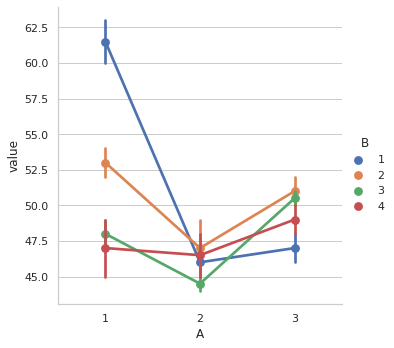

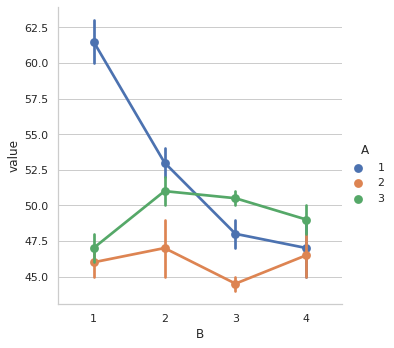

In [25]:
import seaborn as sns

sns.set(style="whitegrid")

sns.catplot("A","value",data=df,kind="point",hue="B")
sns.catplot("B","value",data=df,kind="point",hue="A")